# Washington Post Fatal Shooting Data Analysis
* race:

 * W: White, non-Hispanic
 * B: Black, non-Hispanic
 * A: Asian
 * N: Native American
 * H: Hispanic
 * O: Other
 * None: unknown

* gender:

 * M: Male
 * F: Female
 * None: unknown

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("fatal-police-shootings-data.csv")

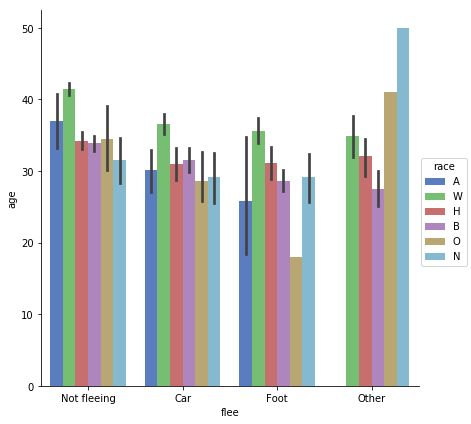

In [3]:
#From https://github.com/springcoil/EDA_data_police_shootings/blob/master/EDA_fatal_shootings.ipynb
sns.factorplot(x="flee", y="age", hue="race", data=df[df.race.notnull()],
                   size=6, kind="bar", palette="muted")

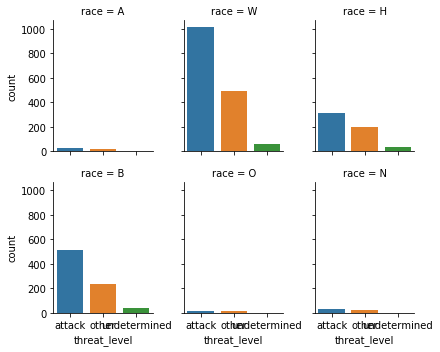

In [4]:
sns.factorplot("threat_level", col="race", col_wrap=3,
...                    data=df[df.race.notnull()],
...                    kind="count", size=2.5, aspect=.8)

In [5]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [6]:
df['race'].value_counts()

W    1569
B     786
H     552
N      52
A      51
O      32
Name: race, dtype: int64

https://www.infoplease.com/us/race-population/population-united-states-race-and-hispaniclatino-origin-census-2000-and-2010
* 63.7% of US pop is W
* 16.3% of US pop is H
* 12.2% of US pop is B
* 4.7% of US pop is A
* 2.4% of US pop is O
* 0.7% of US pop is N

In [7]:
weights=np.array([63.7,12.2, 16.3, 0.7, 4.7, 2.4])/100

In [13]:
perc=df['race'].value_counts()/len(df['race'])

In [14]:
weighted=perc/weights

In [16]:
len(df['race'])

3332

In [17]:
weighted

W    0.739228
B    1.933560
H    1.016357
N    2.229463
A    0.325662
O    0.400160
Name: race, dtype: float64

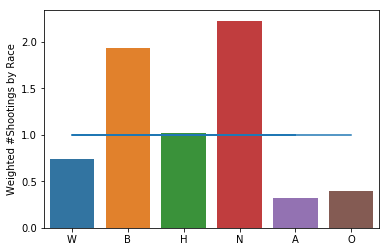

In [19]:
weighted=weighted.rename("Weighted #Shootings by Race")
sns.barplot(weighted.index, weighted)
plt.plot(weighted.index, np.ones(len(weighted.index)))
plt.savefig("weighted_shooting_count.png")

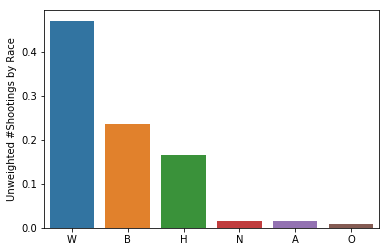

In [20]:
not_weighted=df['race'].value_counts()/len(df['race'])
not_weighted=not_weighted.rename("Unweighted #Shootings by Race")
sns.barplot(not_weighted.index, not_weighted)
plt.savefig("unweighted_shooting_count.png")

In [22]:
range_var=0.1
probs=[0.025,0.5,0.975]
facs=[(1-0.5*range_var),(1+0.5*range_var)]
n_trials=10**5

In [24]:
race_arr=df['race'].value_counts()

In [27]:
d_w=np.random.uniform(race_arr[0]*facs[0],race_arr[0]*facs[1],n_trials)/len(df['race'])
d_b=np.random.uniform(race_arr[1]*facs[0],race_arr[1]*facs[1],n_trials)/len(df['race'])
d_h=np.random.uniform(race_arr[2]*facs[0],race_arr[2]*facs[1],n_trials)/len(df['race'])
d_n=np.random.uniform(race_arr[3]*facs[0],race_arr[3]*facs[1],n_trials)/len(df['race'])
d_a=np.random.uniform(race_arr[4]*facs[0],race_arr[4]*facs[1],n_trials)/len(df['race'])
d_o=np.random.uniform(race_arr[5]*facs[0],race_arr[5]*facs[1],n_trials)/len(df['race'])

In [29]:
#weights=np.array([63.7,12.2, 16.3, 0.7, 4.7, 2.4])/100
d_pw=np.random.uniform(weights[0]*facs[0],weights[0]*facs[1],n_trials)/100
d_pb=np.random.uniform(weights[1]*facs[0],weights[1]*facs[1],n_trials)/100
d_ph=np.random.uniform(weights[2]*facs[0],weights[2]*facs[1],n_trials)/100
d_pn=np.random.uniform(weights[3]*facs[0],weights[3]*facs[1],n_trials)/100
d_pa=np.random.uniform(weights[4]*facs[0],weights[4]*facs[1],n_trials)/100
d_po=np.random.uniform(weights[5]*facs[0],weights[5]*facs[1],n_trials)/100

In [31]:
psw=d_w/d_pw
psb=d_b/d_pb
psh=d_h/d_ph
psn=d_n/d_pn
psa=d_a/d_pa
pso=d_o/d_po

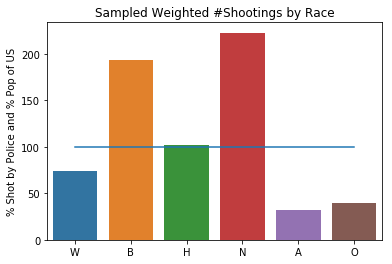

In [46]:
weighted_sampled=pd.Series(data=[np.median(psw),np.median(psb),np.median(psh),np.median(psn),np.median(psa),np.median(pso)],name="Sampled Weighted #Shootings by Race")
sns.barplot(weighted.index, weighted_sampled)
plt.plot(weighted_sampled.index, 100*np.ones(len(weighted_sampled.index)))
plt.ylabel("% Shot by Police and % Pop of US")
plt.title("Sampled Weighted #Shootings by Race")
plt.savefig("sampled_weighted_shootings_by_race.png")

In [33]:
weighted_sampled

[73.9244941859807,
 193.36090316030962,
 101.63708389635042,
 222.98056152783164,
 32.55837522459309,
 40.02498469114239]

In [39]:
w_l=np.percentile(psw, probs[0], axis=0)
w_m=np.percentile(psw, probs[1], axis=0)
w_u=np.percentile(psw, probs[2], axis=0)

b_l=np.percentile(psb, probs[0], axis=0)
b_m=np.percentile(psb, probs[1], axis=0)
b_u=np.percentile(psb, probs[2], axis=0)

h_l=np.percentile(psh, probs[0], axis=0)
h_m=np.percentile(psh, probs[1], axis=0)
h_u=np.percentile(psh, probs[2], axis=0)

n_l=np.percentile(psn, probs[0], axis=0)
n_m=np.percentile(psn, probs[1], axis=0)
n_u=np.percentile(psn, probs[2], axis=0)

a_l=np.percentile(psa, probs[0], axis=0)
a_m=np.percentile(psa, probs[1], axis=0)
a_u=np.percentile(psa, probs[2], axis=0)

o_l=np.percentile(pso, probs[0], axis=0)
o_m=np.percentile(pso, probs[1], axis=0)
o_u=np.percentile(pso, probs[2], axis=0)

(175.35969901327917, 176.75141122316586, 177.4535893346218)